In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import nc_time_axis
import pandas as pd
import matplotlib as mpl
import gcsfs
import zarr

In [2]:
def south_pole_map(cols=1, rows=1, fig_size=(12,8), max_extent=-50, facecolor='white'):
    ''' 
    User note: In order to call the function, begin cell with: fig, ax = south_pole_map(**args).
    
    Neglecting "fig, ax =" at the begeinning will not map your data to the existing axes.
    
    This function sets up a polar projection centered at the South Pole, which DataArrays can be plotted over.
    
    Optional arguments accepted for figure size, maximum (northward) extent and facecolor. Any number of columns and/or rows are also accepted for multiple subplots.
    
    If creating multiple subplots, ax=ax[*index*] must be passed in the plot call for each array.
    
    By default, these are set to (12,8), -50ºS and gray, respectively. Columns/Rows set to 1 by default – specifying axes in which to plot data is not necessary when using default column number.
    '''
    import matplotlib.path as mpath
    import numpy as np
    import cartopy.crs as ccrs
    
    fig,ax = plt.subplots(figsize=fig_size, ncols=cols, nrows=rows, subplot_kw={'projection': ccrs.SouthPolarStereo(), 'facecolor':facecolor}, layout='constrained')

    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    
    if rows>1 and cols>1:
        for i in range(rows):
            for j in range(cols):
                ax[i,j].set_boundary(circle, transform=ax[i,j].transAxes)

                # lat/long map extents. shows south pole out to 50ºS
                ax[i,j].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    elif cols>1 and rows==1:
        for i in range(cols):
            ax[i].set_boundary(circle, transform=ax[i].transAxes)

            # lat/long map extents. shows south pole out to 50ºS
            ax[i].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    elif rows>1 and cols==1:
        for i in range(rows):
            ax[i].set_boundary(circle, transform=ax[i].transAxes)

            # lat/long map extents. shows south pole out to 50ºS
            ax[i].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    else:
        ax.set_boundary(circle, transform=ax.transAxes)

            # lat/long map extents. shows south pole out to 50ºS
        ax.set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    
    
    #must return fig, ax when creating multiple subplots in a function
    return fig, ax

In [3]:
cm4x_static=xr.open_dataset('/backup/tuq41374/model_output/cm4x/p25/atmos/static/atmos.static.nc')
cm4_static=xr.open_dataset('/backup/tuq41374/model_output/cmip6/piControl/gfdl_cm4/atmos/static/atmos.static.nc')
esm4_static=xr.open_dataset('/backup/tuq41374/model_output/cmip6/piControl/gfdl_esm4/atmos/static/atmos.static.nc')

In [4]:
cm4x_static_oceanNAN= cm4x_static.land_mask.where(cm4x_static.land_mask>0)
cm4x_elevation= cm4x_static_oceanNAN * cm4x_static.zsurf

cm4_static_oceanNAN= cm4_static.land_mask.where(cm4_static.land_mask>0)
cm4_elevation= cm4_static_oceanNAN * cm4_static.zsurf

esm4_static_oceanNAN= esm4_static.land_mask.where(esm4_static.land_mask>0)
esm4_elevation= esm4_static_oceanNAN*esm4_static.zsurf

In [5]:
cm4_elevation

<xarray.DataArray (lat: 180, lon: 288)>
array([[2870.0527, 2870.0527, 2870.0527, ..., 2870.0527, 2870.0527,
        2870.0527],
       [2709.0625, 2710.6968, 2712.3481, ..., 2704.262 , 2705.845 ,
        2707.4453],
       [2616.3882, 2617.2688, 2618.154 , ..., 2613.7744, 2614.641 ,
        2615.5125],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4

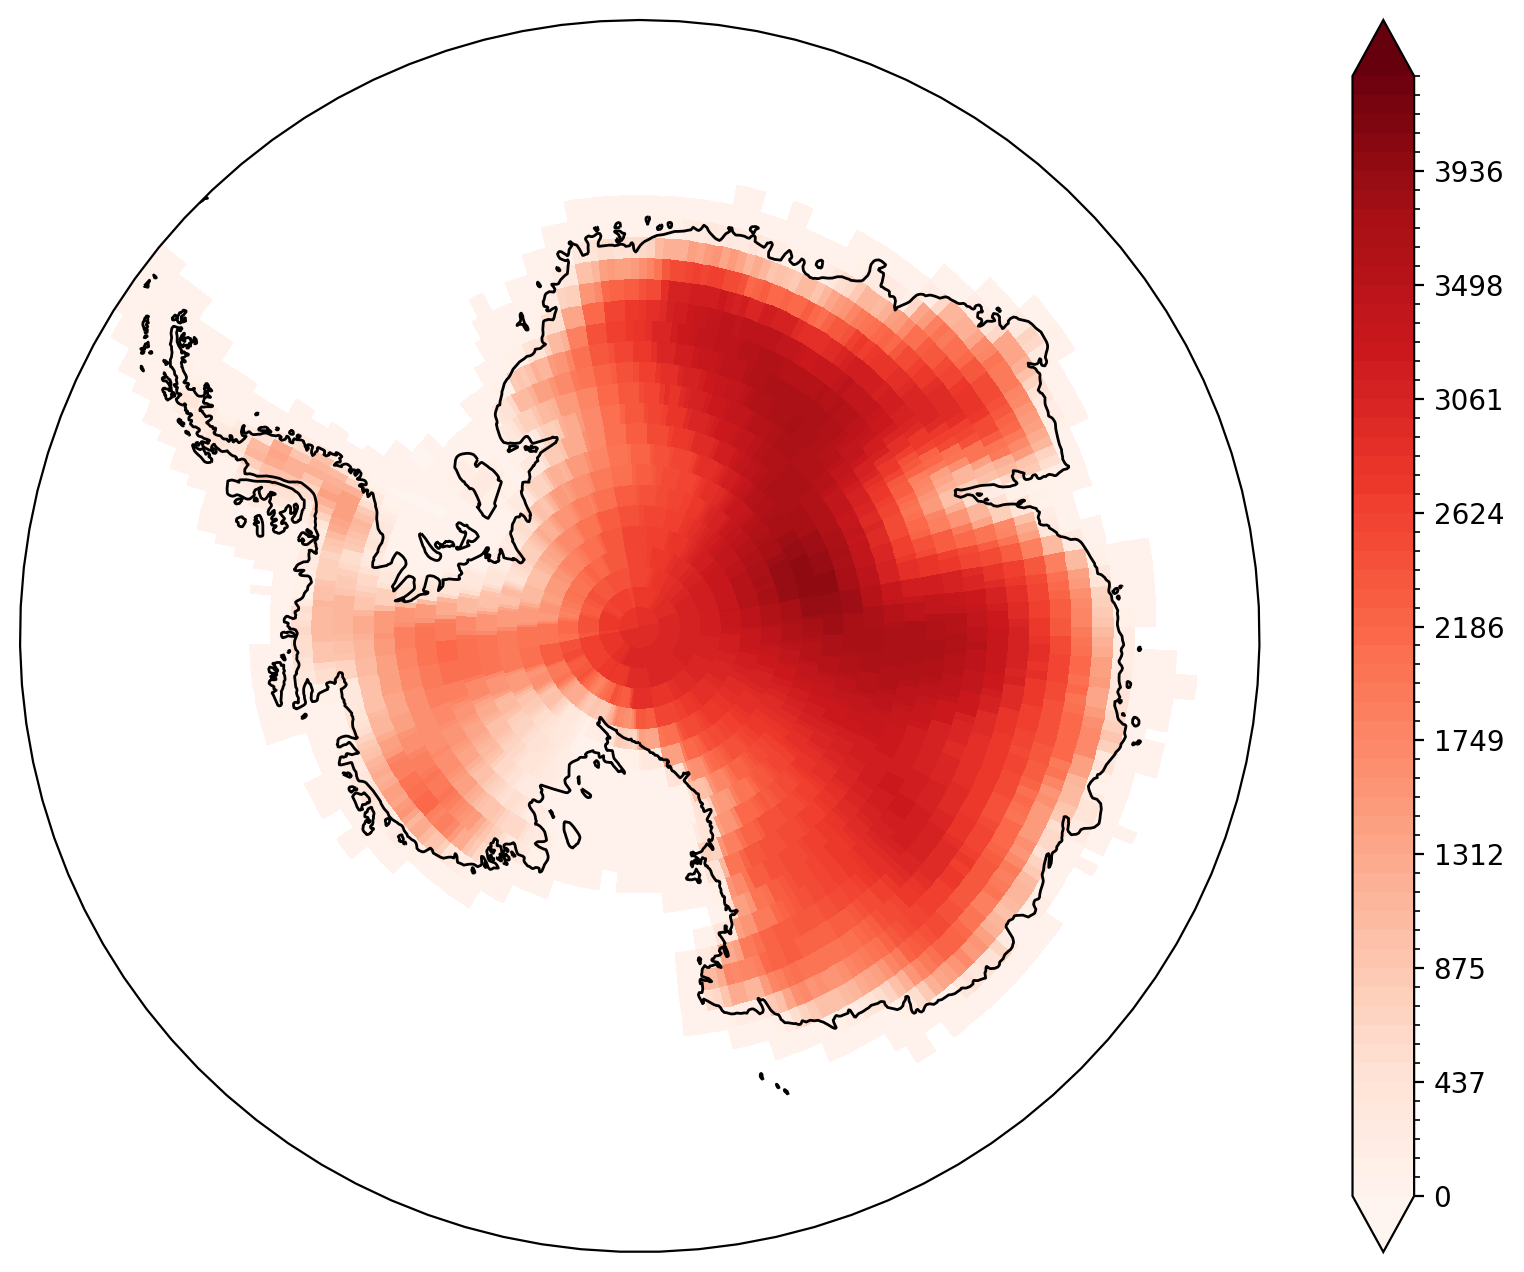

In [6]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
cm4_elevation.plot(ax=ax,
               transform= ccrs.PlateCarree(),
                    levels=60,
                    cmap='Reds',
                    vmin=0, vmax=4300)

   
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())


theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

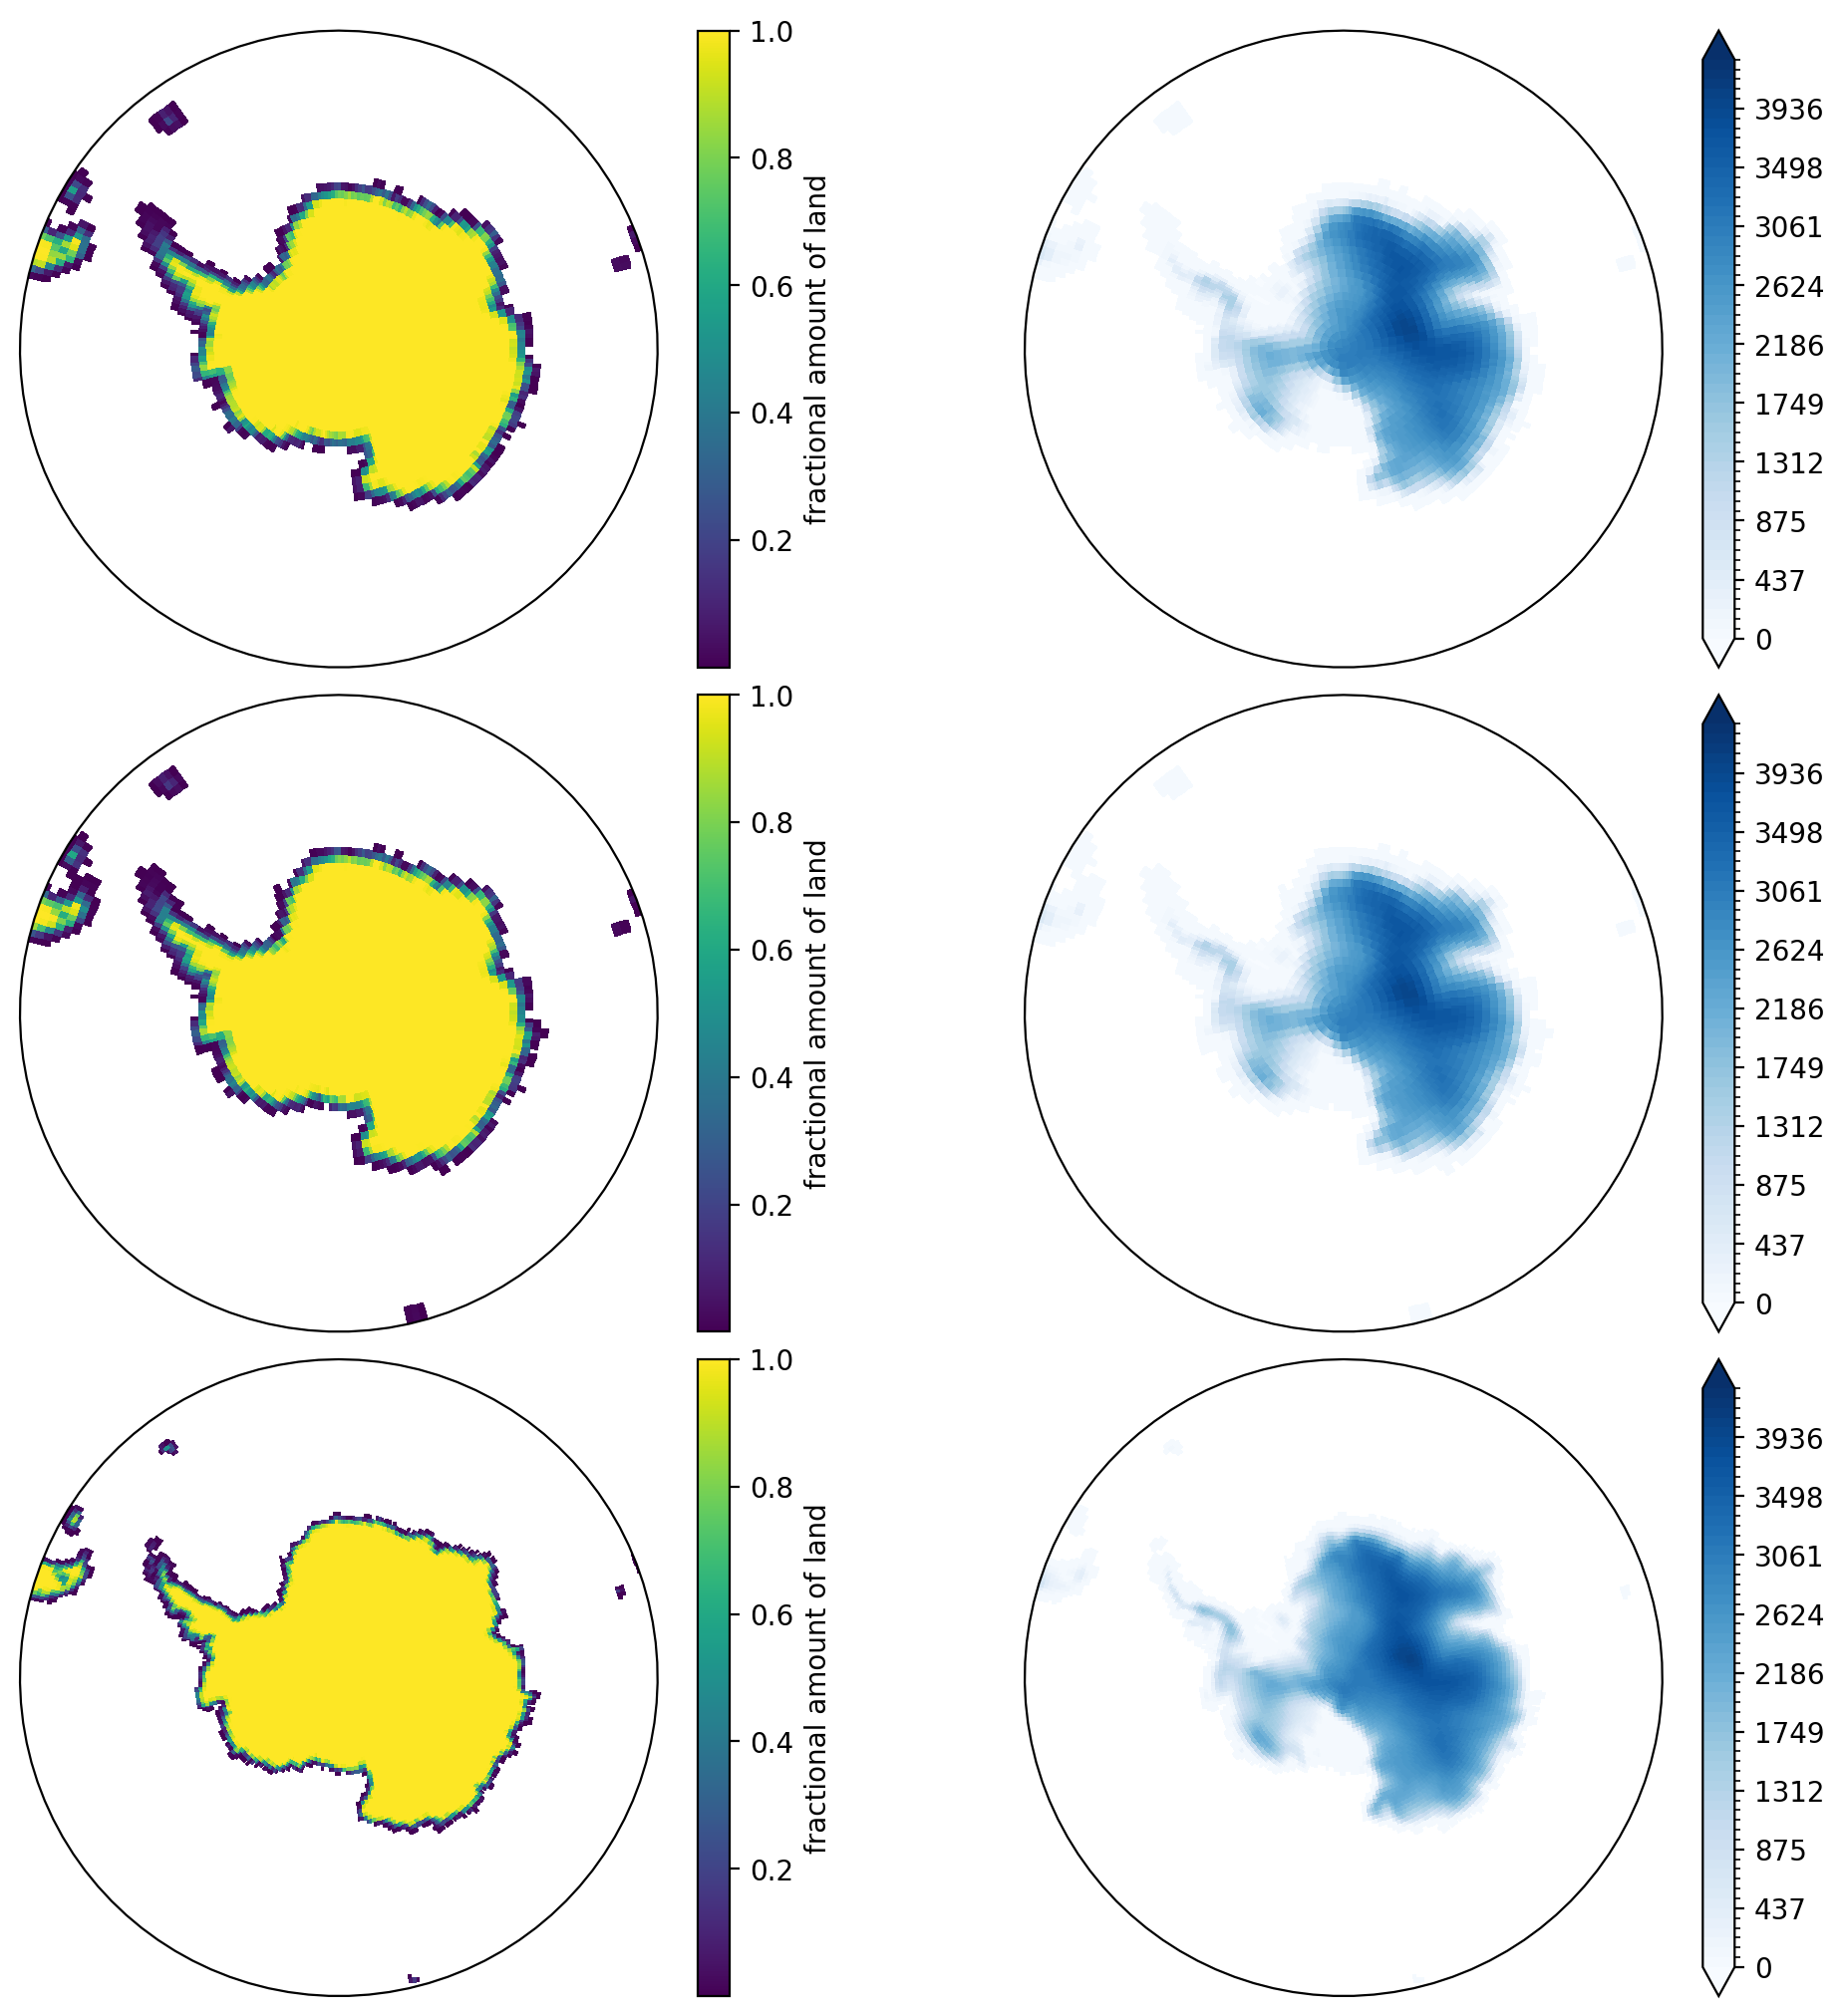

In [7]:
fig, ax = south_pole_map(cols=2, rows=3, fig_size=(10,10))

esm4_static_oceanNAN.plot(ax=ax[0,0],
                          transform= ccrs.PlateCarree(),
                         )
esm4_elevation.plot(ax=ax[0,1],
                    transform= ccrs.PlateCarree(),
                    levels=60,
                    cmap='Blues',
                    vmin=0,
                    vmax=4300)
cm4_static_oceanNAN.plot(ax=ax[1,0],
                          transform= ccrs.PlateCarree(),)
cm4_elevation.plot(ax=ax[1,1],
               transform= ccrs.PlateCarree(),
                    levels=60,
                    cmap='Blues',
                    vmin=0, vmax=4300)

cm4x_static_oceanNAN.plot(ax=ax[2,0],
                          transform= ccrs.PlateCarree(),
                         )
cm4x_elevation.plot(ax=ax[2,1],
                    transform= ccrs.PlateCarree(),
                    levels=60,
                    cmap='Blues',
                    vmin=0, vmax=4300)
                    

In [8]:
ross_CM4 = cm4_elevation.sel(lat=slice(-99,-75)).sel(lon=slice(150,240)).where(cm4_elevation<=300)
ross_ESM4 = esm4_elevation.sel(lat=slice(-99,-75)).sel(lon=slice(150,240)).where(esm4_elevation<=300)
ross_CM4X= cm4x_elevation.sel(lat=slice(-99,-75)).sel(lon=slice(150,240)).where(cm4x_elevation<=300)

filchner_CM4 = cm4_elevation.sel(lat=slice(-99,-76)).sel(lon=slice(270,340)).where(cm4_elevation<=300)
filchner_ESM4 = esm4_elevation.sel(lat=slice(-99,-76)).sel(lon=slice(270,340)).where(esm4_elevation<=300)
filchner_CM4X= cm4x_elevation.sel(lat=slice(-99,-76)).sel(lon=slice(270,340)).where(cm4x_elevation<=300)

peninsula_CM4 = cm4_elevation.sel(lat=slice(-74,-59)).sel(lon=slice(270,320))
peninsula_ESM4 = esm4_elevation.sel(lat=slice(-74,-59)).sel(lon=slice(270,320))
peninsula_CM4X= cm4x_elevation.sel(lat=slice(-74,-59)).sel(lon=slice(270,320))

loweast_CM4 = cm4_elevation.sel(lat=slice(-99,-59)).sel(lon=slice(0,180)).where(cm4_elevation<=2250).where(cm4_elevation>300)
loweast_ESM4 = esm4_elevation.sel(lat=slice(-99,-59)).sel(lon=slice(0,180)).where(esm4_elevation<=2250).where(esm4_elevation>300)
loweast_CM4X = cm4x_elevation.sel(lat=slice(-99,-59)).sel(lon=slice(0,180)).where(cm4x_elevation<=2250).where(cm4x_elevation>300)

lowwest_CM4 = cm4_elevation.sel(lat=slice(-99,-72)).sel(lon=slice(180,360)).where(cm4_elevation<=2250).where(cm4_elevation>300)
lowwest_ESM4 = esm4_elevation.sel(lat=slice(-99,-72)).sel(lon=slice(180,360)).where(esm4_elevation<=2250).where(esm4_elevation>300)
lowwest_CM4X= cm4x_elevation.sel(lat=slice(-99,-72)).sel(lon=slice(180,360)).where(cm4x_elevation<=2250).where(cm4x_elevation>300)
plateau_CM4 = cm4_elevation.sel(lat=slice(-99,-59)).sel(lon=slice(0,360)).where(cm4_elevation>=2250)
plateau_ESM4 = esm4_elevation.sel(lat=slice(-99,-59)).sel(lon=slice(0,360)).where(esm4_elevation>=2250) 
plateau_CM4X = cm4x_elevation.sel(lat=slice(-99,-59)).sel(lon=slice(0,360)).where(cm4x_elevation>=2250)

In [9]:
ross_CM4_mask = (ross_CM4 / ross_CM4)
ross_ESM4_mask = (ross_ESM4 / ross_ESM4)
ross_CM4X_mask = (ross_CM4X / ross_CM4X)

filchner_CM4_mask = (filchner_CM4 / filchner_CM4)
filchner_ESM4_mask = (filchner_ESM4 / filchner_ESM4)
filchner_CM4X_mask = (filchner_CM4X / filchner_CM4X)

peninsula_CM4_mask = (peninsula_CM4 / peninsula_CM4)
peninsula_ESM4_mask = (peninsula_ESM4 / peninsula_ESM4)
peninsula_CM4X_mask = (peninsula_CM4X / peninsula_CM4X)

loweast_CM4_mask = (loweast_CM4 / loweast_CM4)
loweast_ESM4_mask = (loweast_ESM4 / loweast_ESM4)
loweast_CM4X_mask = (loweast_CM4X / loweast_CM4X)

lowwest_CM4_mask = (lowwest_CM4 /lowwest_CM4)
lowwest_ESM4_mask = (lowwest_ESM4 / lowwest_ESM4)
lowwest_CM4X_mask = (lowwest_CM4X / lowwest_CM4X)

plateau_CM4_mask = (plateau_CM4 / plateau_CM4)
plateau_ESM4_mask = (plateau_ESM4 / plateau_ESM4)
plateau_CM4X_mask = (plateau_CM4X / plateau_CM4X)

/tmp/ipykernel_441898/3773071435.py:95: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


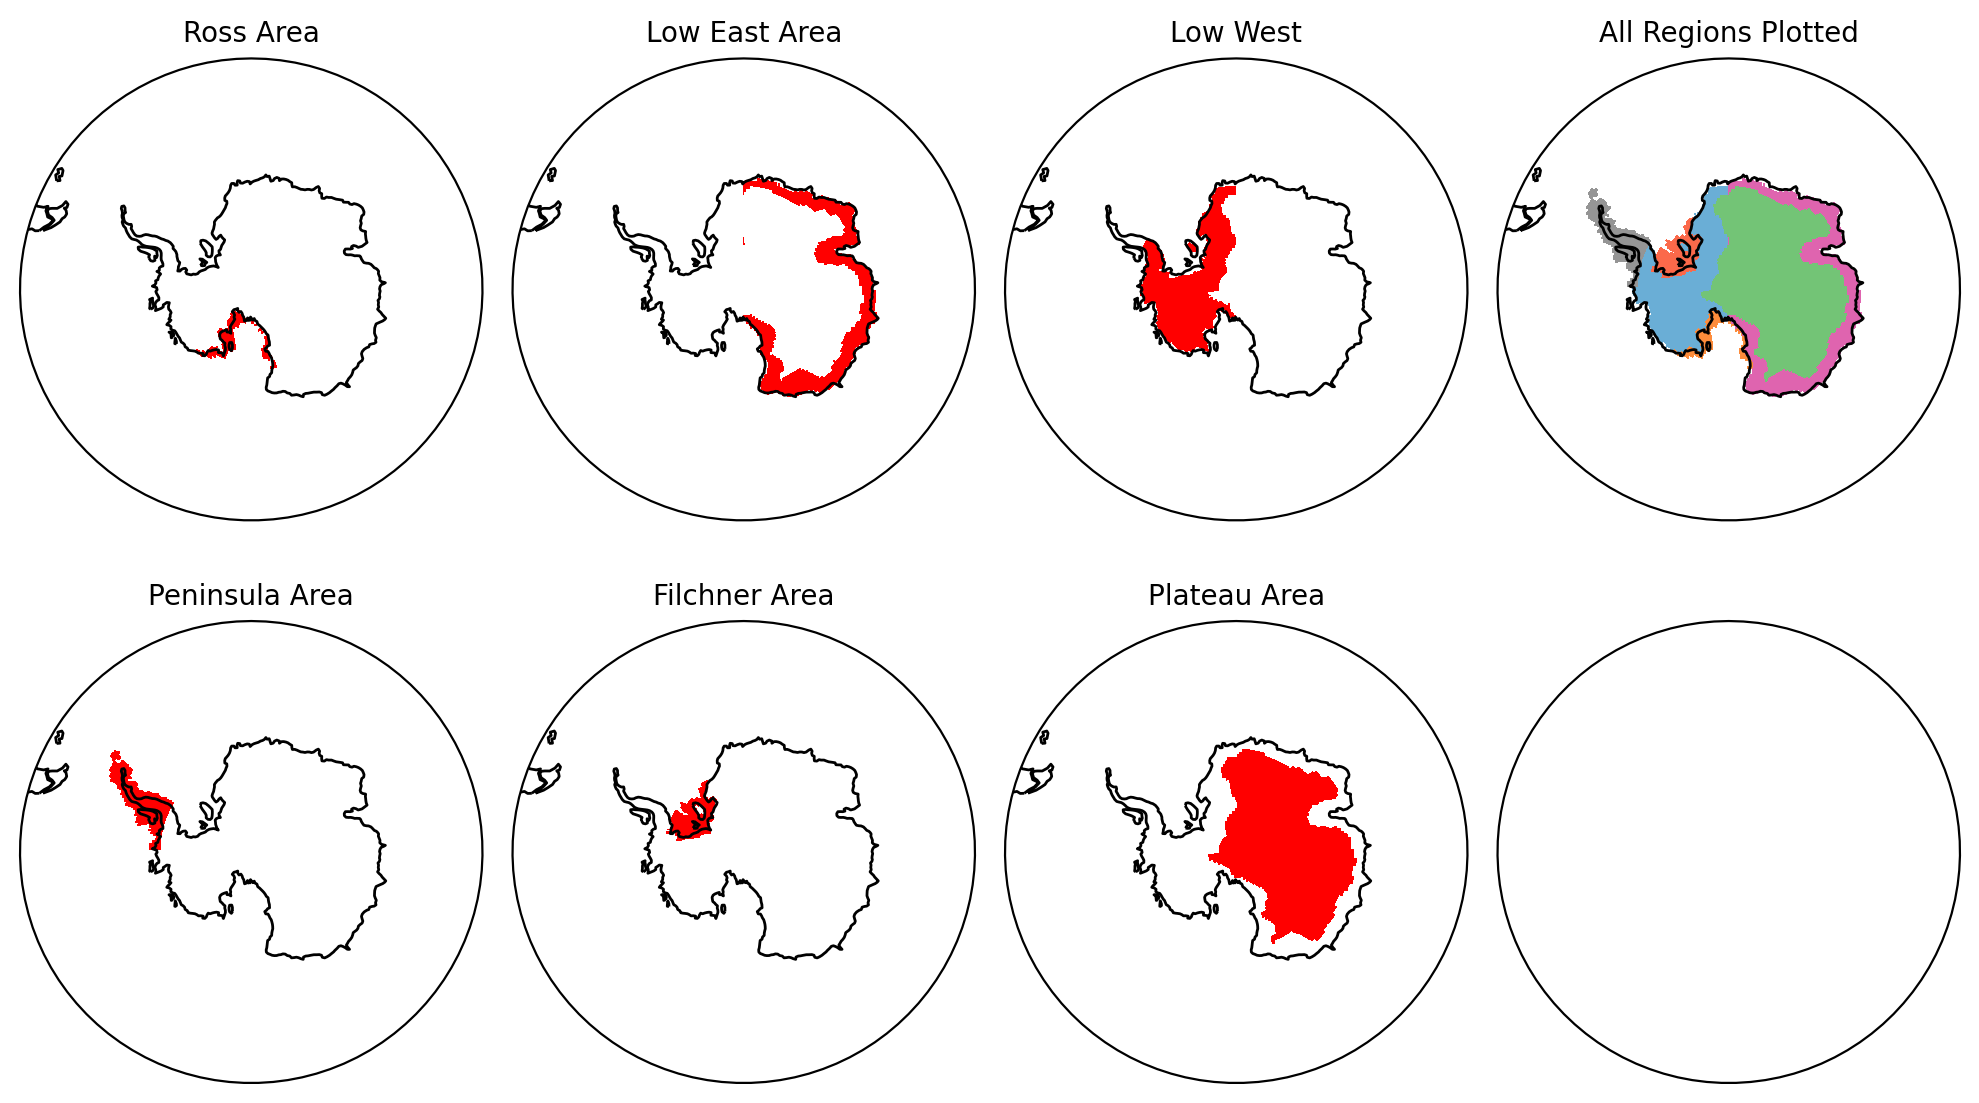

In [10]:
fig, ax = south_pole_map(cols=4, rows=2,fig_size=(10,6))


ross_CM4X_mask.plot(ax=ax[0,0],
              transform =ccrs.PlateCarree(),
              vmin=0,
              vmax=4000,
              extend='both',
               # alpha= 0.5,
              cmap='r',add_colorbar=False, levels=60)
    
loweast_CM4X_mask.plot(ax=ax[0,1],
              transform =ccrs.PlateCarree(),
              vmin=0,
              vmax=4000,
              extend='both',
               # alpha=0.5,
              cmap='r', add_colorbar=False, levels=60)
lowwest_CM4X_mask.plot(ax=ax[0,2],
               transform =ccrs.PlateCarree(),
               vmin=0,
               vmax=4000,
               extend='both',
                # alpha= 0.2,
               cmap='r',add_colorbar=False, levels=60)
    
peninsula_CM4X_mask.plot(ax=ax[1,0],
            transform =ccrs.PlateCarree(),
              vmin=0,
               vmax=4000,
               extend='both',
                # alpha=0.5,
               cmap= 'r',add_colorbar=False, levels=60)
filchner_CM4X_mask.plot(ax=ax[1,1],
              transform =ccrs.PlateCarree(),
              vmin=0,
              vmax=4000,
              extend='both',
              cmap='r',add_colorbar=False, levels=60)
plateau_CM4X_mask.plot(ax=ax[1,2],
              transform =ccrs.PlateCarree(),
              vmin=0,
              vmax=4000,
              extend='both',
               # alpha=0.5,
              cmap='r',add_colorbar=False, levels=60)
ross_CM4X_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Oranges", add_colorbar=False)

loweast_CM4X_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="PuRd", add_colorbar=False)


lowwest_CM4X_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Blues", add_colorbar=False)

peninsula_CM4X_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Greys", add_colorbar=False)

filchner_CM4X_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Reds", add_colorbar=False)

plateau_CM4X_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Greens", add_colorbar=False)



ax[0,0].coastlines()
ax[0,1].coastlines()
ax[0,2].coastlines()
ax[1,0].coastlines()
ax[1,1].coastlines()
ax[1,2].coastlines()
ax[0,3].coastlines()

ax[0,0].set_title('Ross Area',size=10)
ax[0,1].set_title('Low East Area',size=10)
ax[0,2].set_title('Low West',size=10)
ax[1,0].set_title('Peninsula Area',size=10)
ax[1,1].set_title('Filchner Area',size=10)
ax[1,2].set_title('Plateau Area',size=10)
ax[0,3].set_title('All Regions Plotted',size=10)
plt.tight_layout()



/tmp/ipykernel_441898/731934095.py:95: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


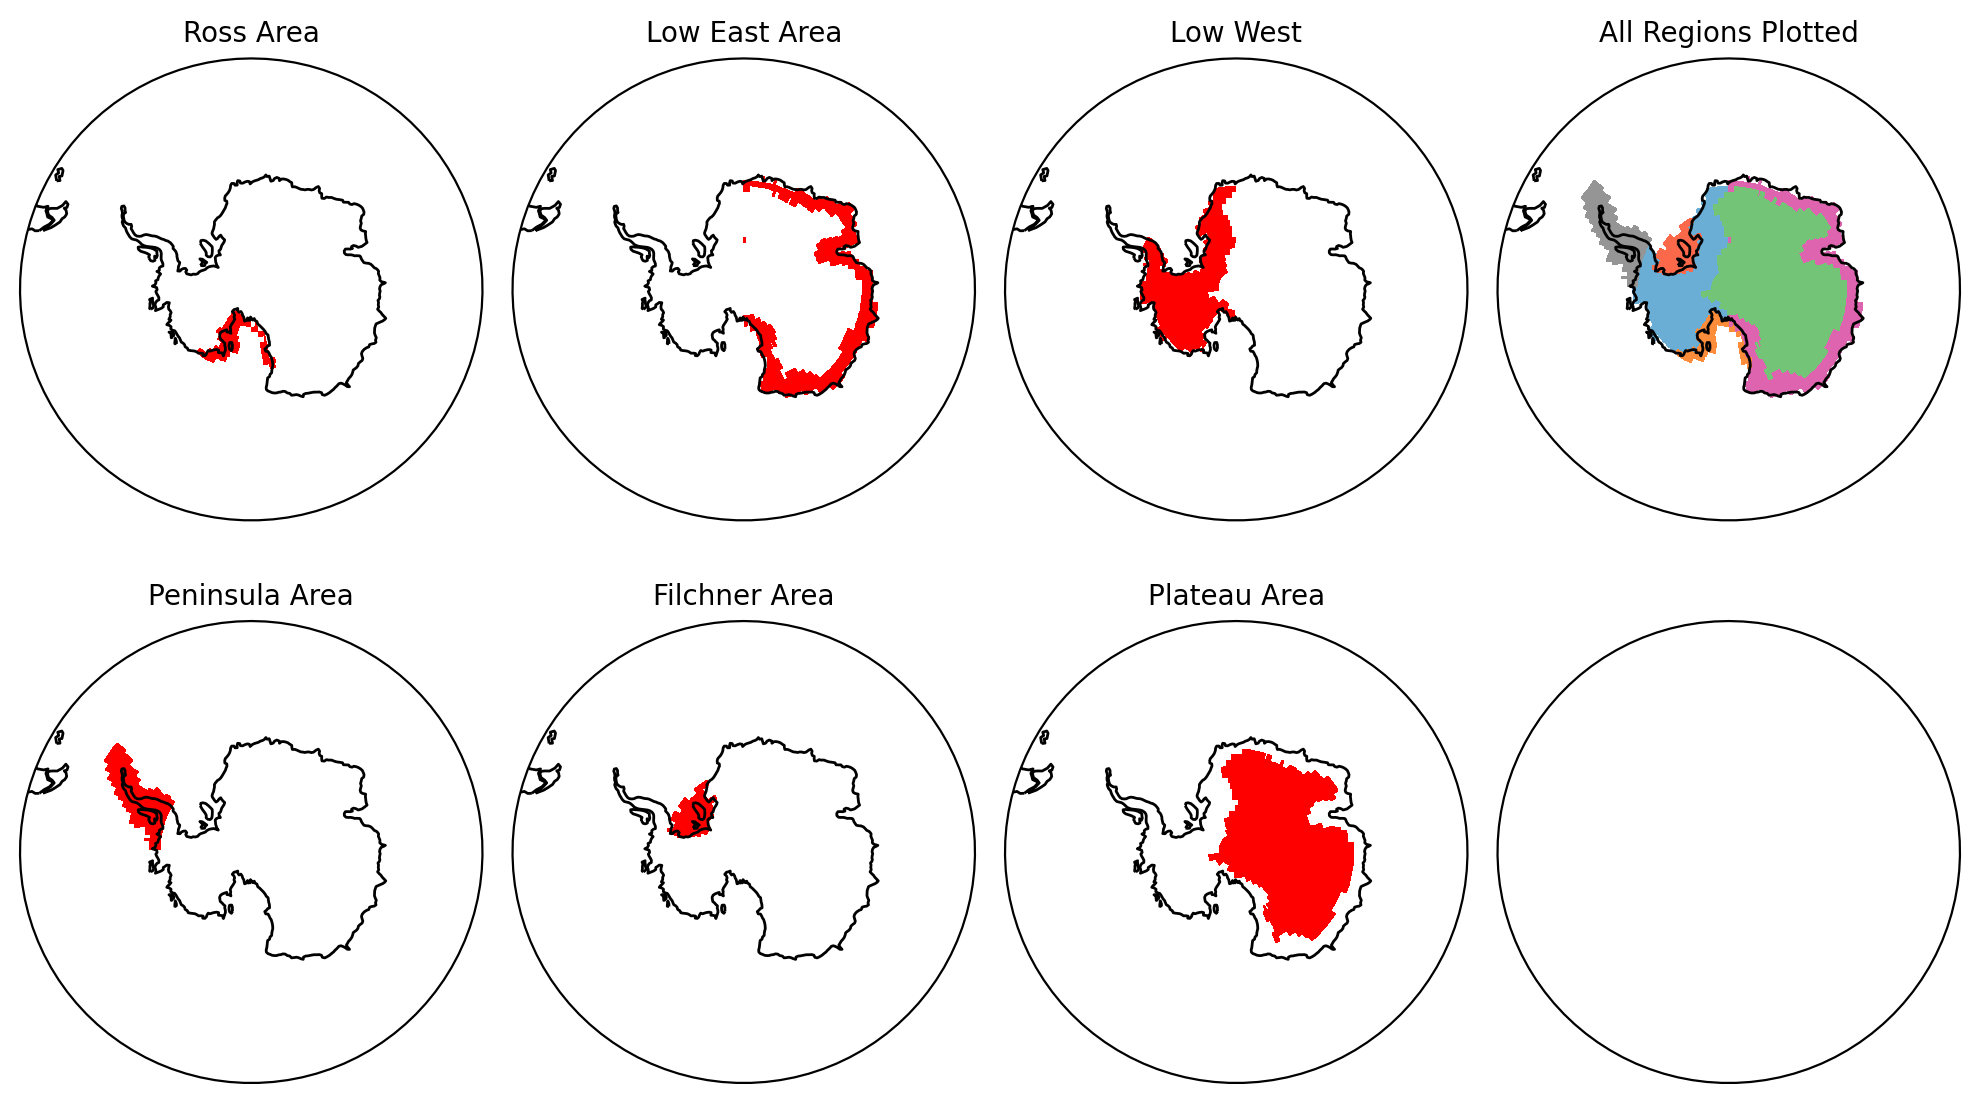

In [11]:
fig, ax = south_pole_map(cols=4, rows=2,fig_size=(10,6))


ross_CM4_mask.plot(ax=ax[0,0],
              transform =ccrs.PlateCarree(),
              vmin=0,
              vmax=4000,
              extend='both',
               # alpha= 0.5,
              cmap='r',add_colorbar=False, levels=60)
    
loweast_CM4_mask.plot(ax=ax[0,1],
              transform =ccrs.PlateCarree(),
              vmin=0,
              vmax=4000,
              extend='both',
               # alpha=0.5,
              cmap='r', add_colorbar=False, levels=60)
lowwest_CM4_mask.plot(ax=ax[0,2],
               transform =ccrs.PlateCarree(),
               vmin=0,
               vmax=4000,
               extend='both',
                # alpha= 0.2,
               cmap='r',add_colorbar=False, levels=60)
    
peninsula_CM4_mask.plot(ax=ax[1,0],
            transform =ccrs.PlateCarree(),
              vmin=0,
               vmax=4000,
               extend='both',
                # alpha=0.5,
               cmap= 'r',add_colorbar=False, levels=60)
filchner_CM4_mask.plot(ax=ax[1,1],
              transform =ccrs.PlateCarree(),
              vmin=0,
              vmax=4000,
              extend='both',
              cmap='r',add_colorbar=False, levels=60)
plateau_CM4_mask.plot(ax=ax[1,2],
              transform =ccrs.PlateCarree(),
              vmin=0,
              vmax=4000,
              extend='both',
               # alpha=0.5,
              cmap='r',add_colorbar=False, levels=60)
ross_CM4_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Oranges", add_colorbar=False)

loweast_CM4_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="PuRd", add_colorbar=False)


lowwest_CM4_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Blues", add_colorbar=False)

peninsula_CM4_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Greys", add_colorbar=False)

filchner_CM4_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Reds", add_colorbar=False)

plateau_CM4_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Greens", add_colorbar=False)



ax[0,0].coastlines()
ax[0,1].coastlines()
ax[0,2].coastlines()
ax[1,0].coastlines()
ax[1,1].coastlines()
ax[1,2].coastlines()
ax[0,3].coastlines()

ax[0,0].set_title('Ross Area',size=10)
ax[0,1].set_title('Low East Area',size=10)
ax[0,2].set_title('Low West',size=10)
ax[1,0].set_title('Peninsula Area',size=10)
ax[1,1].set_title('Filchner Area',size=10)
ax[1,2].set_title('Plateau Area',size=10)
ax[0,3].set_title('All Regions Plotted',size=10)
plt.tight_layout()



/tmp/ipykernel_441898/1559724215.py:95: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


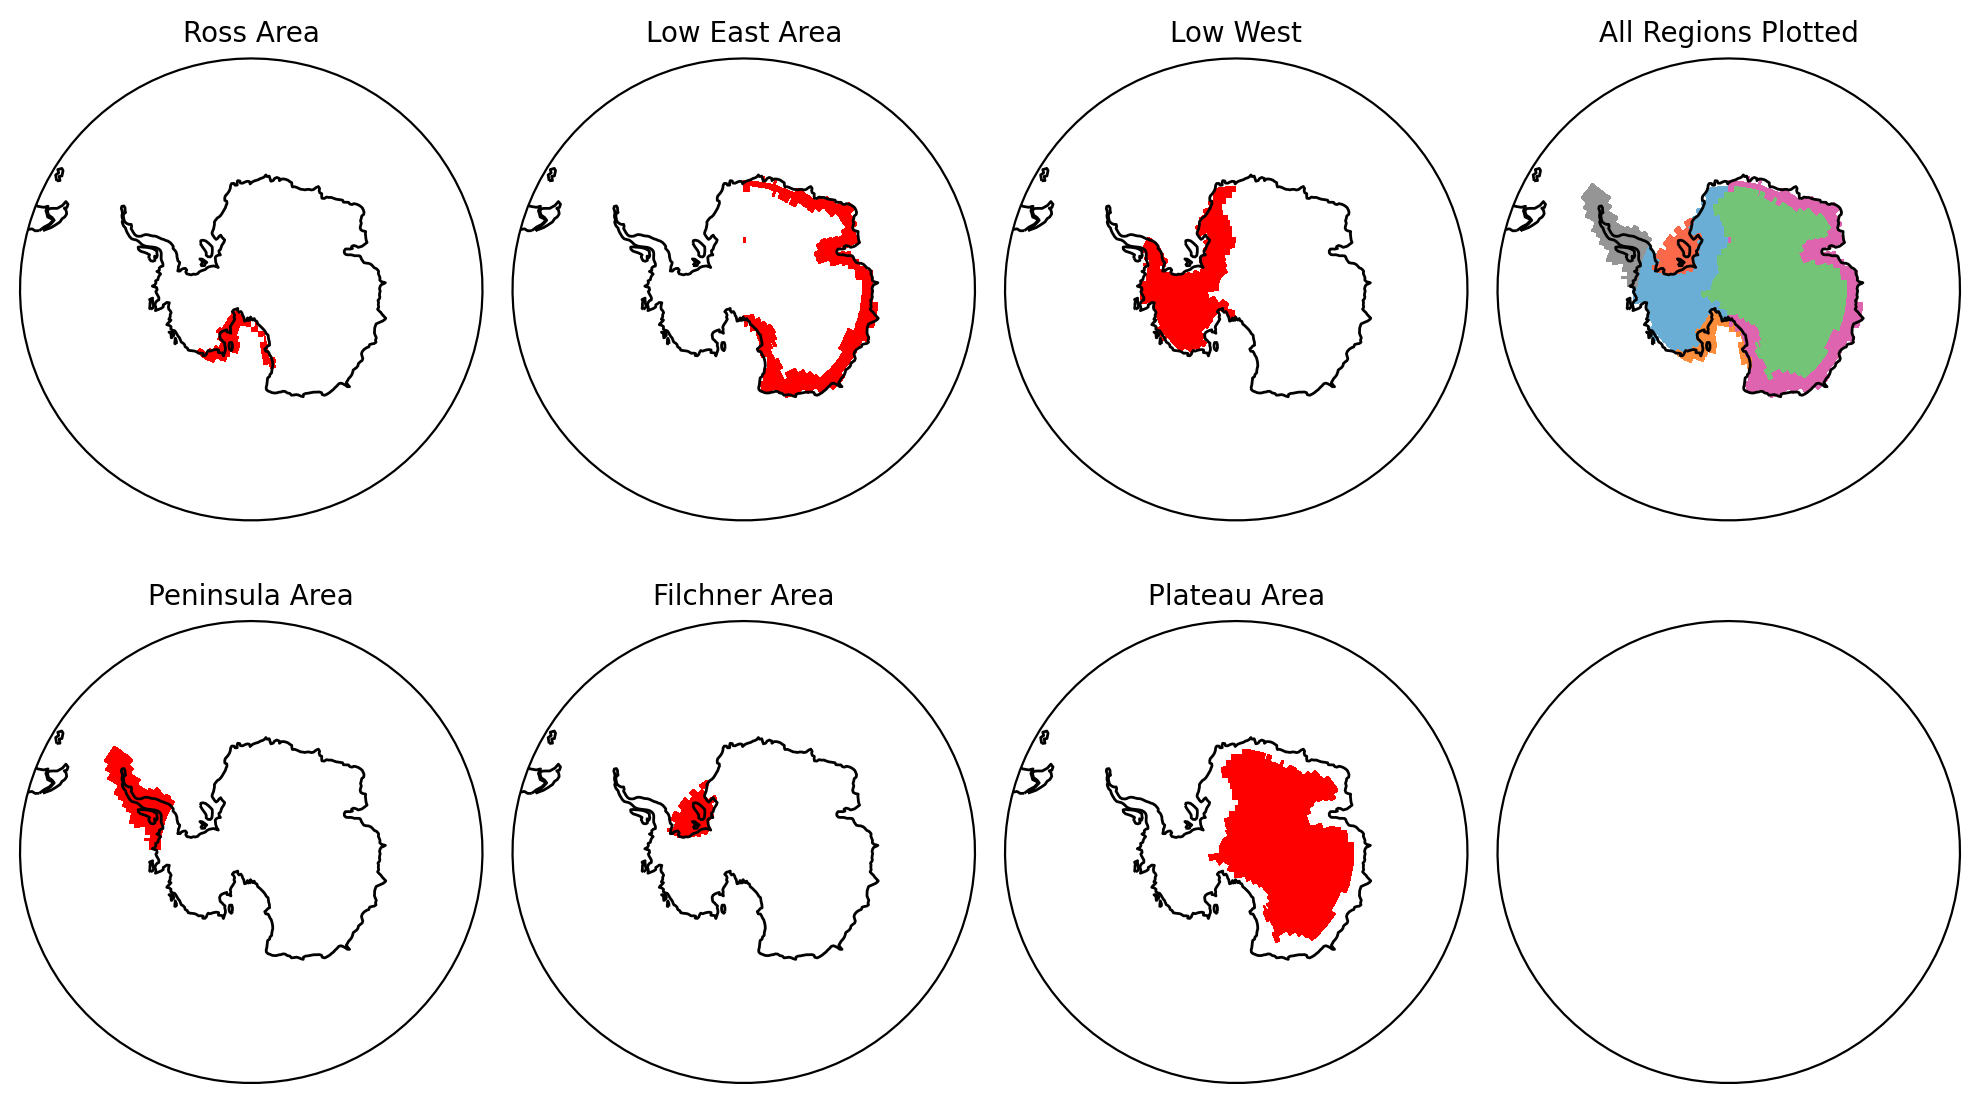

In [12]:
fig, ax = south_pole_map(cols=4, rows=2,fig_size=(10,6))


ross_ESM4_mask.plot(ax=ax[0,0],
              transform =ccrs.PlateCarree(),
              vmin=0,
              vmax=4000,
              extend='both',
               # alpha= 0.5,
              cmap='r',add_colorbar=False, levels=60)
    
loweast_ESM4_mask.plot(ax=ax[0,1],
              transform =ccrs.PlateCarree(),
              vmin=0,
              vmax=4000,
              extend='both',
               # alpha=0.5,
              cmap='r', add_colorbar=False, levels=60)
lowwest_ESM4_mask.plot(ax=ax[0,2],
               transform =ccrs.PlateCarree(),
               vmin=0,
               vmax=4000,
               extend='both',
                # alpha= 0.2,
               cmap='r',add_colorbar=False, levels=60)
    
peninsula_ESM4_mask.plot(ax=ax[1,0],
            transform =ccrs.PlateCarree(),
              vmin=0,
               vmax=4000,
               extend='both',
                # alpha=0.5,
               cmap= 'r',add_colorbar=False, levels=60)
filchner_ESM4_mask.plot(ax=ax[1,1],
              transform =ccrs.PlateCarree(),
              vmin=0,
              vmax=4000,
              extend='both',
              cmap='r',add_colorbar=False, levels=60)
plateau_ESM4_mask.plot(ax=ax[1,2],
              transform =ccrs.PlateCarree(),
              vmin=0,
              vmax=4000,
              extend='both',
               # alpha=0.5,
              cmap='r',add_colorbar=False, levels=60)
ross_ESM4_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Oranges", add_colorbar=False)

loweast_ESM4_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="PuRd", add_colorbar=False)


lowwest_ESM4_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Blues", add_colorbar=False)

peninsula_ESM4_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Greys", add_colorbar=False)

filchner_ESM4_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Reds", add_colorbar=False)

plateau_ESM4_mask.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap="Greens", add_colorbar=False)



ax[0,0].coastlines()
ax[0,1].coastlines()
ax[0,2].coastlines()
ax[1,0].coastlines()
ax[1,1].coastlines()
ax[1,2].coastlines()
ax[0,3].coastlines()

ax[0,0].set_title('Ross Area',size=10)
ax[0,1].set_title('Low East Area',size=10)
ax[0,2].set_title('Low West',size=10)
ax[1,0].set_title('Peninsula Area',size=10)
ax[1,1].set_title('Filchner Area',size=10)
ax[1,2].set_title('Plateau Area',size=10)
ax[0,3].set_title('All Regions Plotted',size=10)
plt.tight_layout()



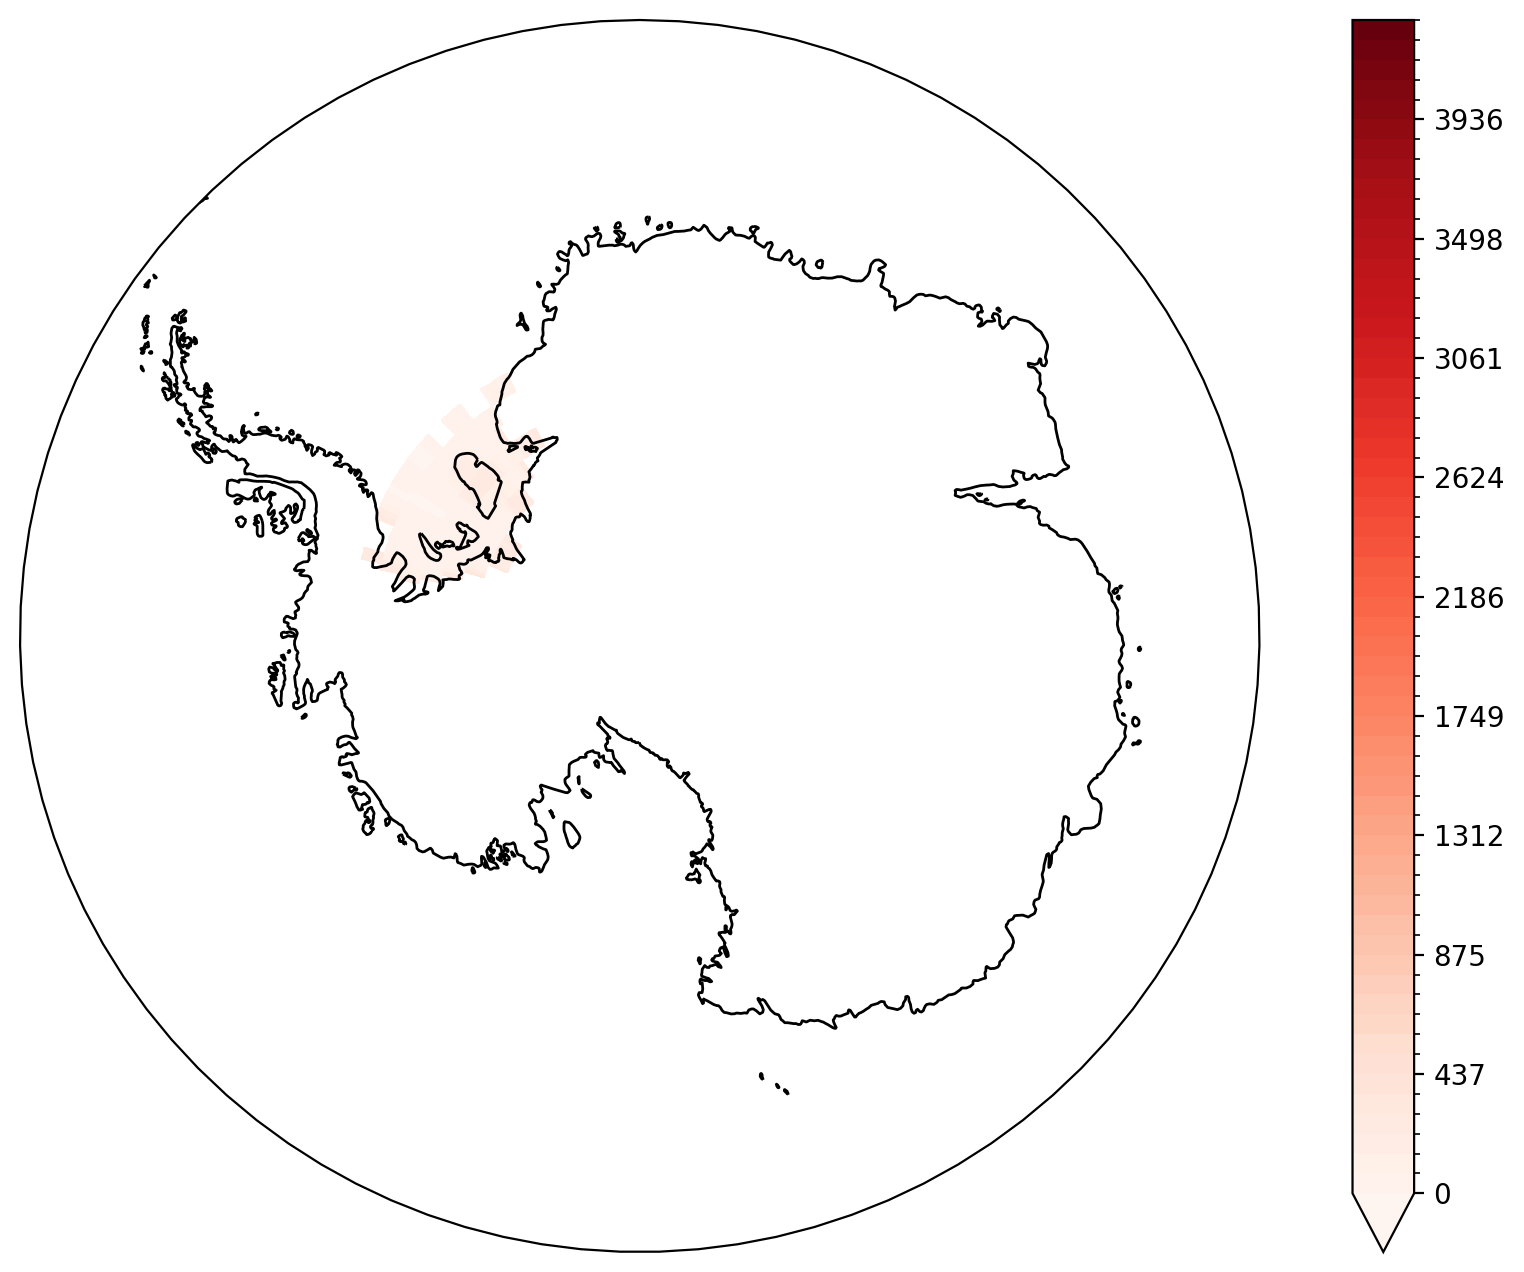

In [13]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
filchner_ESM4.plot(ax=ax,
               transform= ccrs.PlateCarree(),
                    levels=60,
                    cmap='Reds',
                    vmin=0, vmax=4300)

   
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())


theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

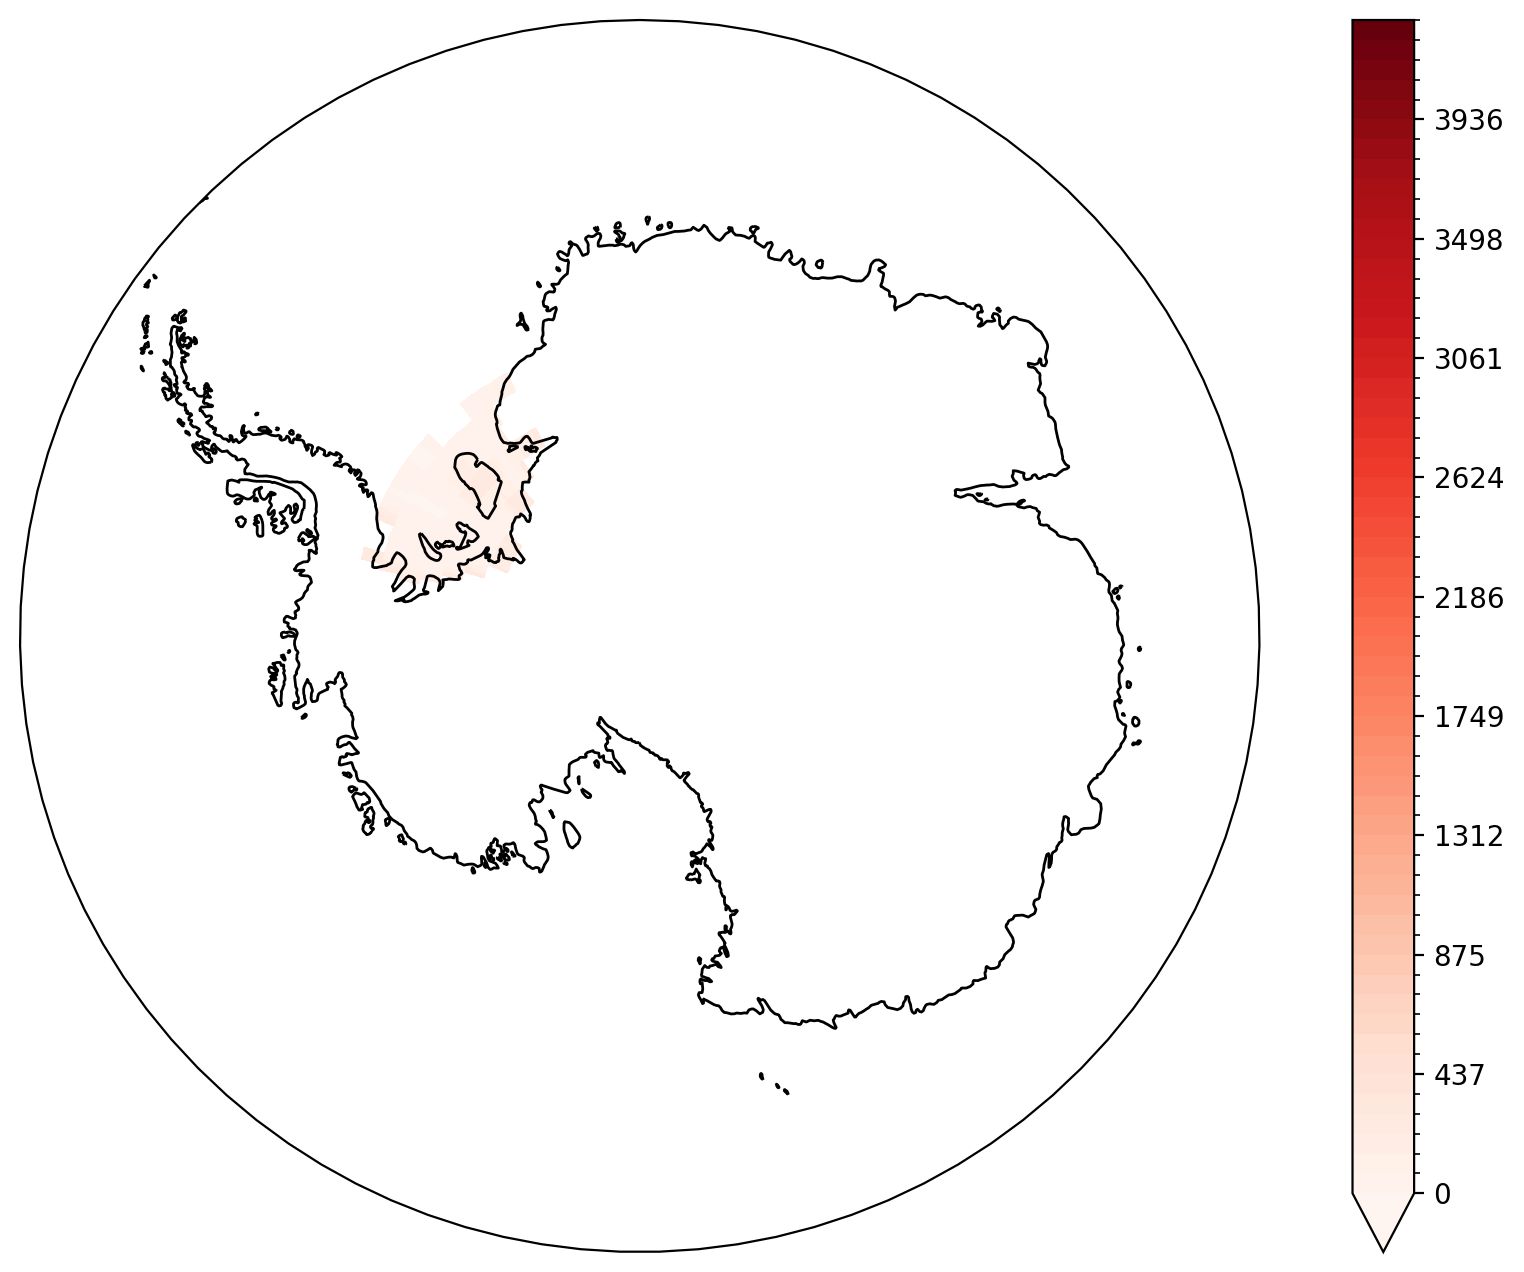

In [14]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
filchner_CM4.plot(ax=ax,
               transform= ccrs.PlateCarree(),
                    levels=60,
                    cmap='Reds',
                    vmin=0, vmax=4300)

   
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())


theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

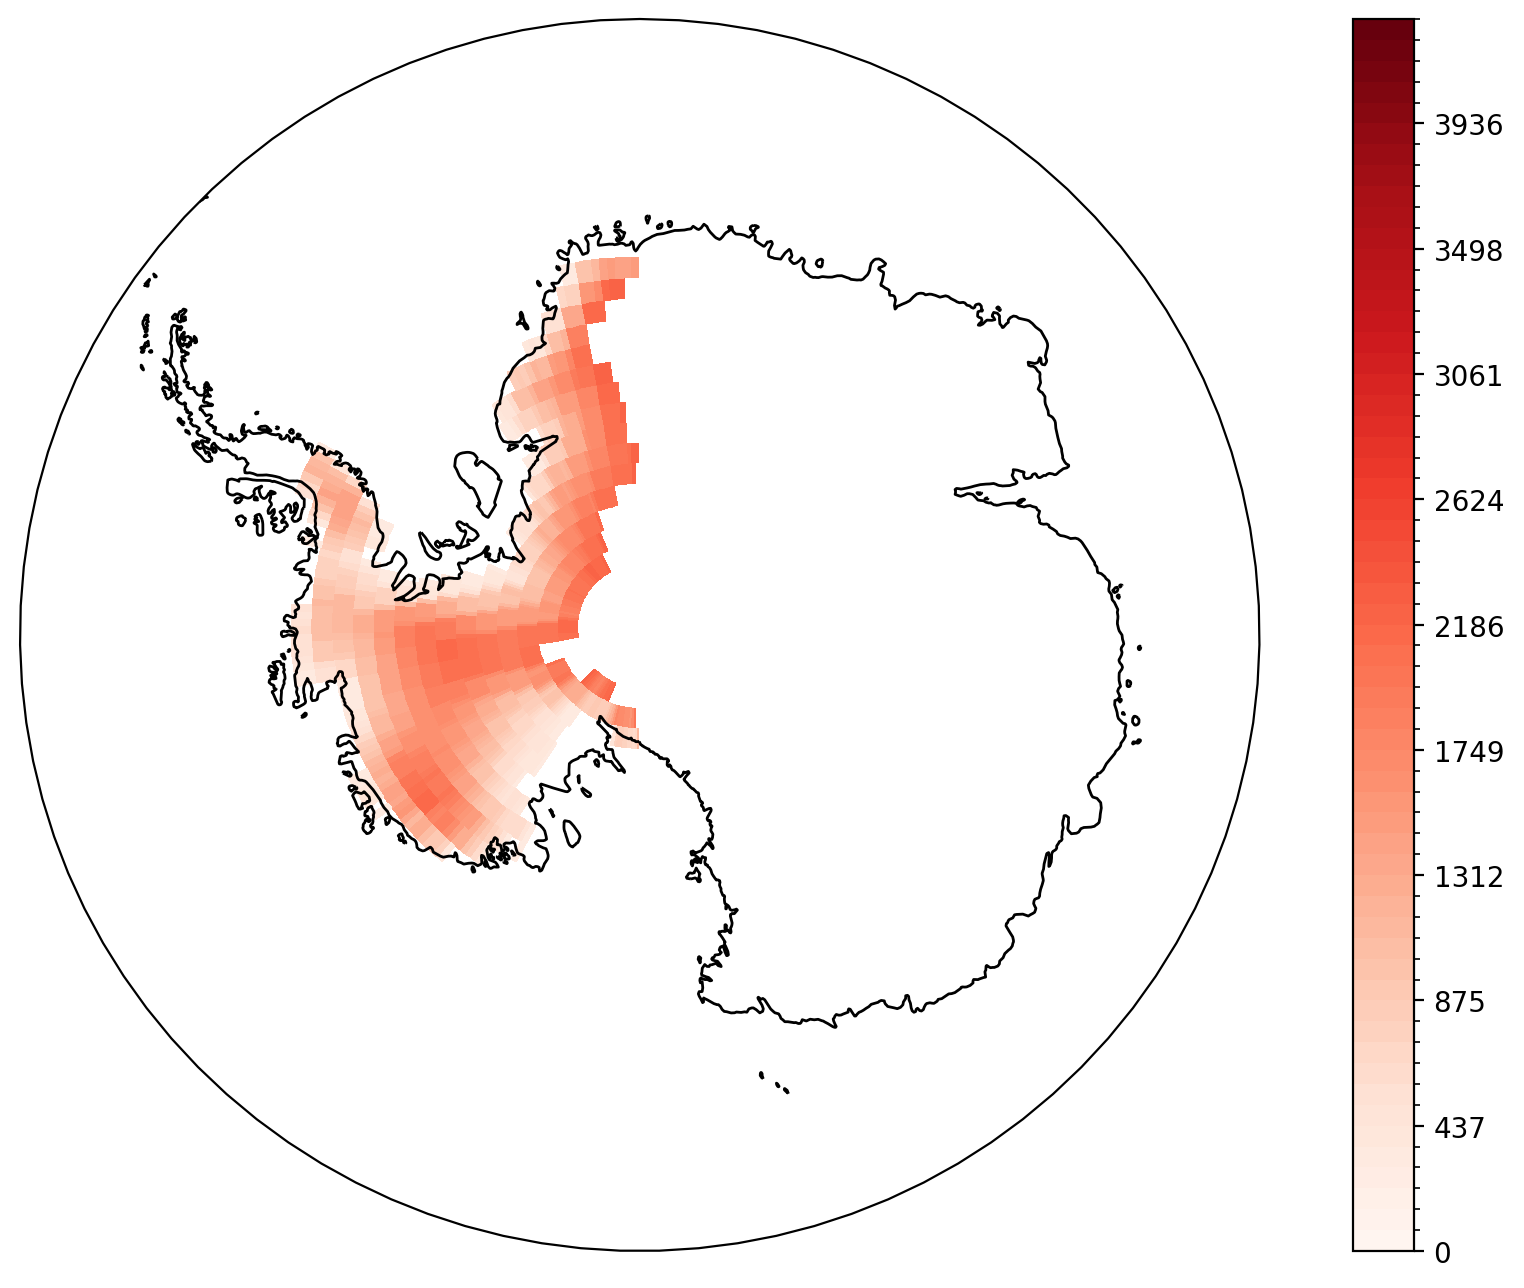

In [15]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
lowwest_CM4.plot(ax=ax,
               transform= ccrs.PlateCarree(),
                    levels=60,
                    cmap='Reds',
                    vmin=0, vmax=4300)

   
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())


theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

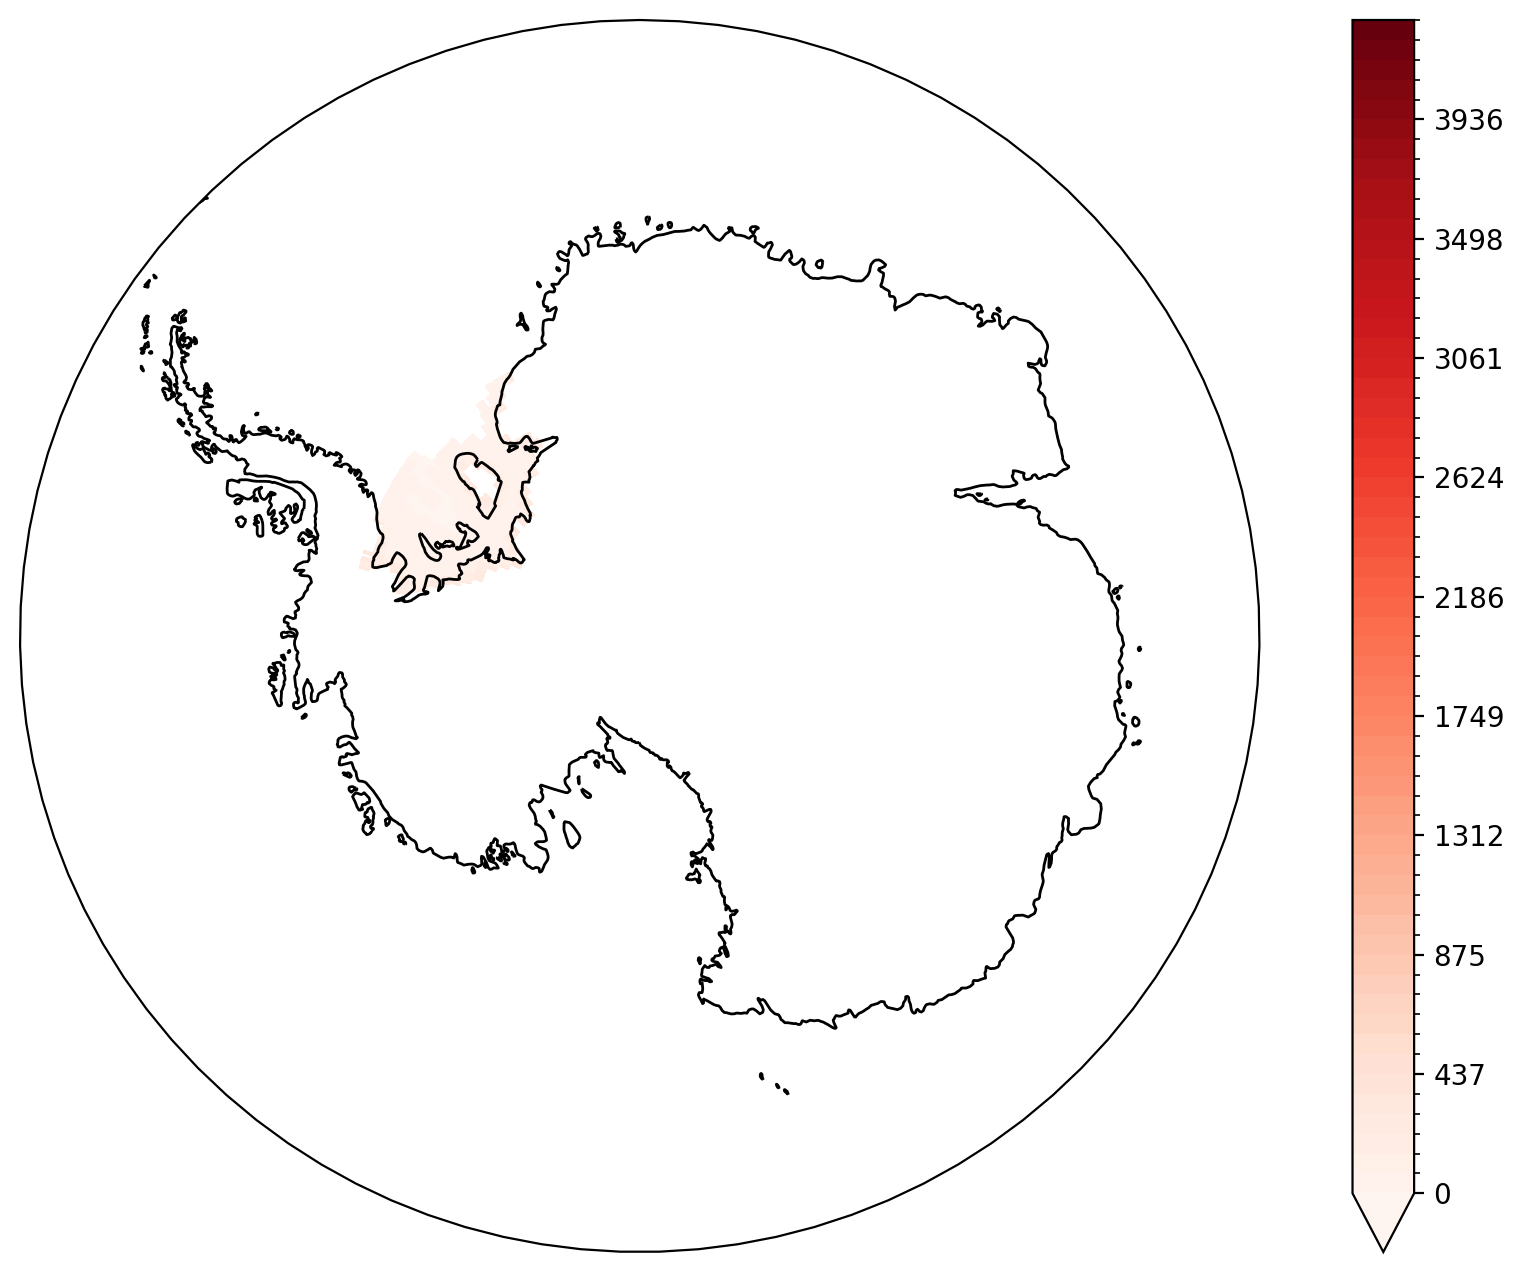

In [16]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
filchner_CM4X.plot(ax=ax,
               transform= ccrs.PlateCarree(),
                    levels=60,
                    cmap='Reds',
                    vmin=0, vmax=4300)

   
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())


theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

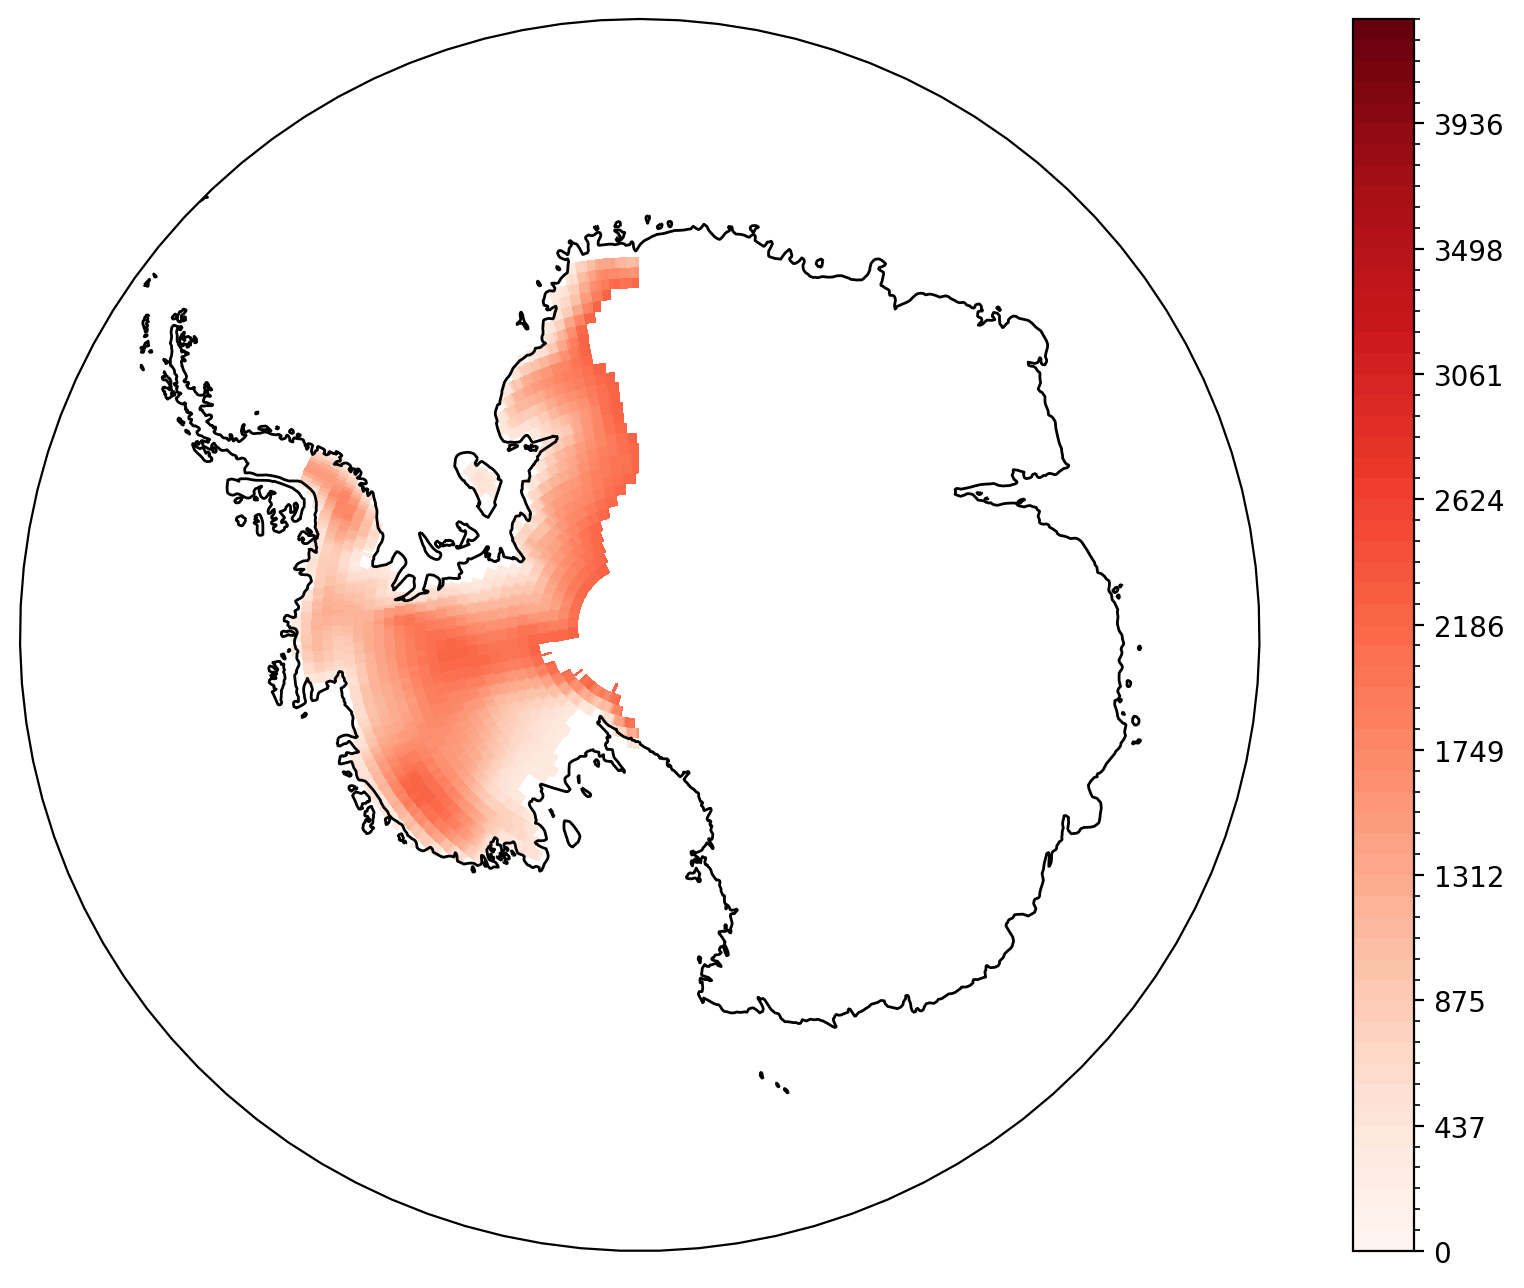

In [17]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
lowwest_CM4X.plot(ax=ax,
               transform= ccrs.PlateCarree(),
                    levels=60,
                    cmap='Reds',
                    vmin=0, vmax=4300)

   
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())


theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

In [18]:
cm4_berkner_island= cm4_elevation.sel(lat= slice(-81, -77)).sel(lon=slice(305,315))

In [19]:
cm4_berkner_island

<xarray.DataArray (lat: 4, lon: 8)>
array([[ 33.379326 ,  51.692024 ,  90.30852  , 123.29092  , 123.169785 ,
        121.61143  , 140.84377  , 148.706    ],
       [ 64.91053  , 145.991    , 206.24553  , 255.59076  , 261.1151   ,
        259.4263   , 239.28847  , 228.17459  ],
       [ 30.041563 ,  70.91187  ,  91.36101  , 111.3166   , 153.21027  ,
        161.3205   , 161.52933  , 131.12097  ],
       [  0.3200059,   4.4038444,  18.082703 ,  10.139273 ,   1.7333004,
          1.0629476,   1.969507 ,  10.81878  ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -80.5 -79.5 -78.5 -77.5
  * lon      (lon) float64 305.6 306.9 308.1 309.4 310.6 311.9 313.1 314.4

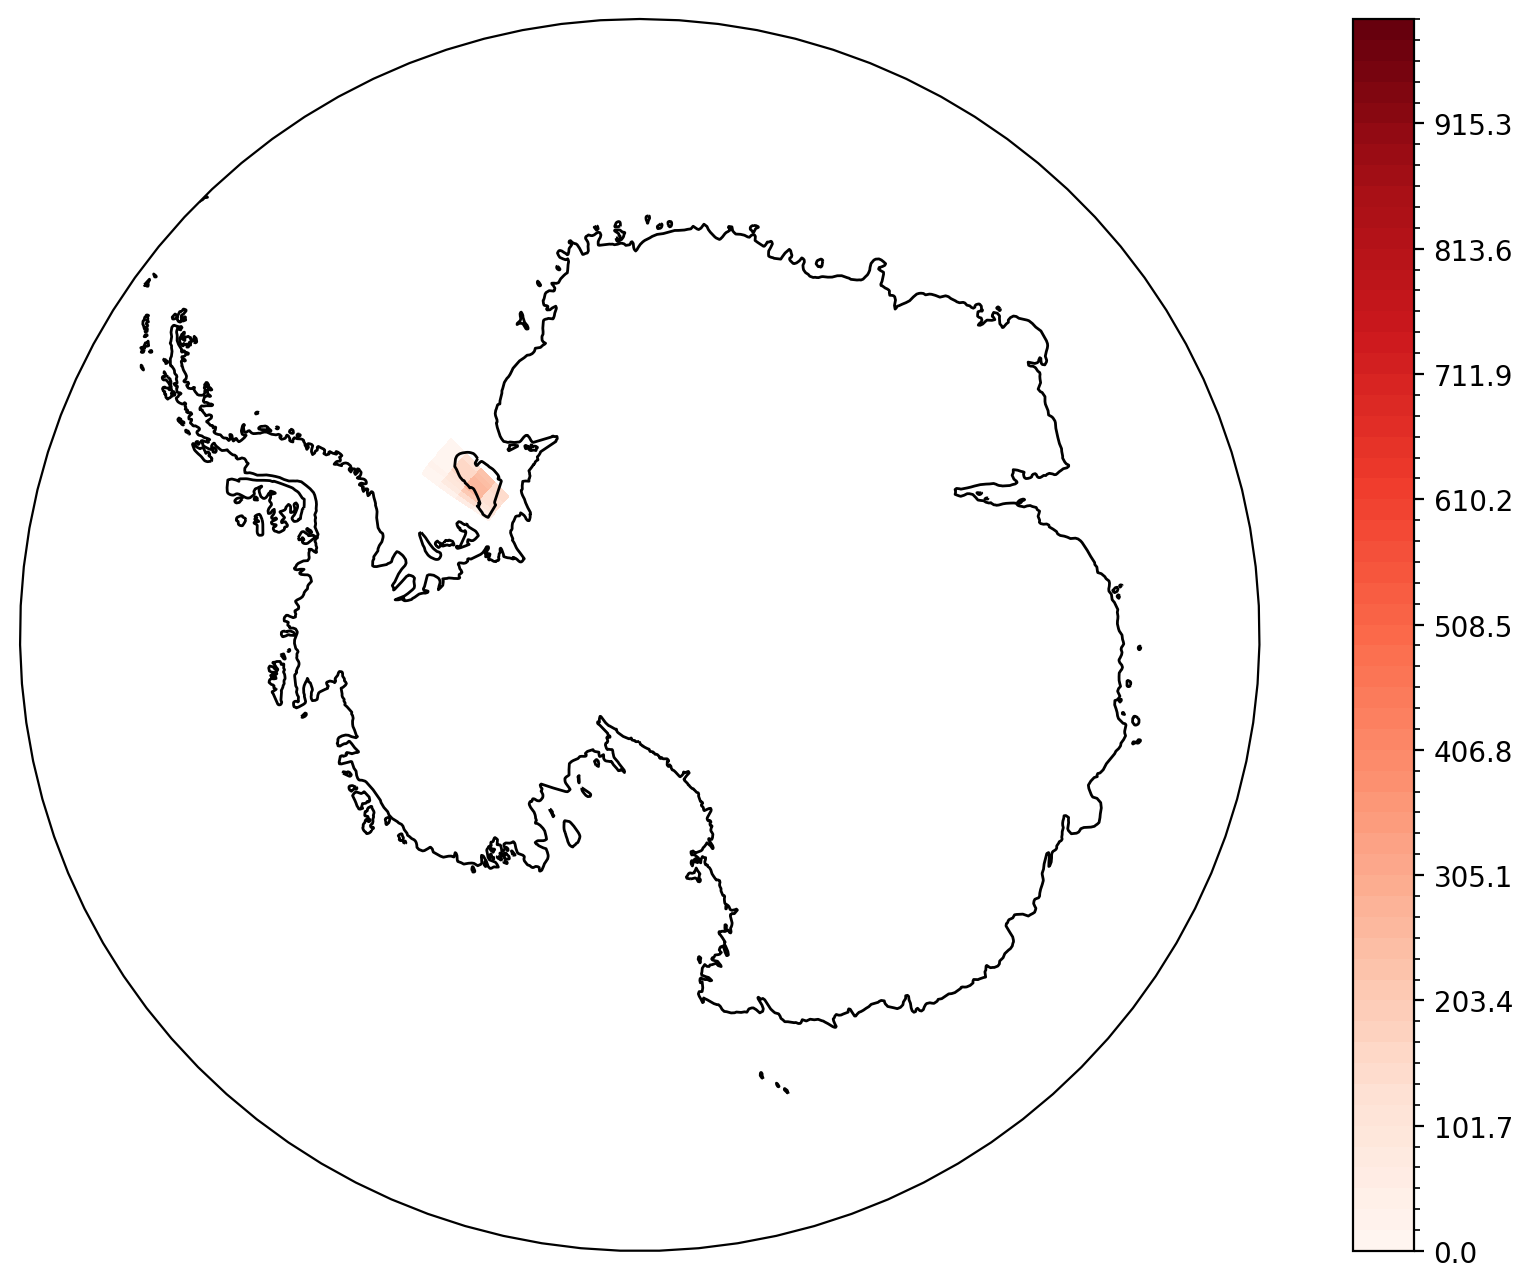

In [20]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
cm4_berkner_island.plot(ax=ax,
               transform= ccrs.PlateCarree(),
                    levels=60,
                    cmap='Reds',
                    vmin=0, vmax=1000)

   
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())


theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

In [21]:
cm4x_berkner_island= cm4x_elevation.sel(lat= slice(-81, -77)).sel(lon=slice(305,315))

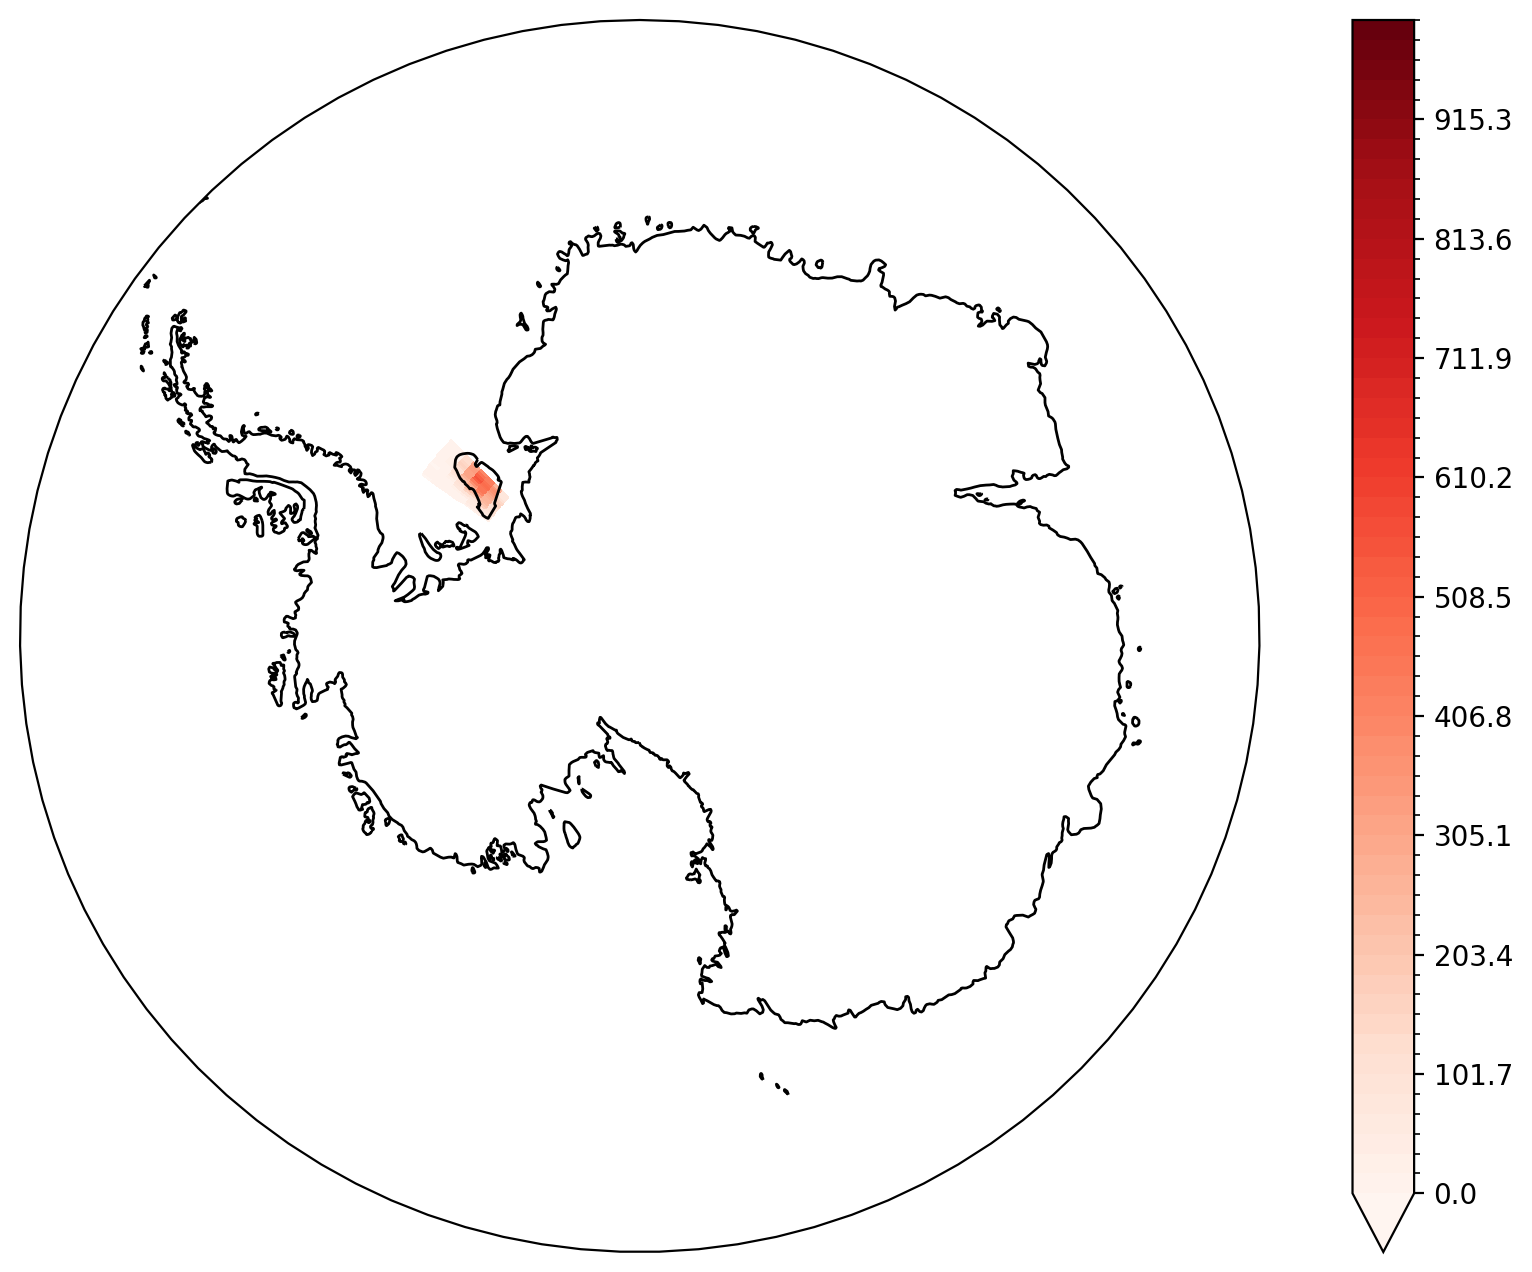

In [22]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
cm4x_berkner_island.plot(ax=ax,
               transform= ccrs.PlateCarree(),
                    levels=60,
                    cmap='Reds',
                    vmin=0, vmax=1000)

   
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())


theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

In [23]:
cm4_berkner_island_val= print(cm4_berkner_island.values)

[[ 33.379326   51.692024   90.30852   123.29092   123.169785  121.61143
  140.84377   148.706    ]
 [ 64.91053   145.991     206.24553   255.59076   261.1151    259.4263
  239.28847   228.17459  ]
 [ 30.041563   70.91187    91.36101   111.3166    153.21027   161.3205
  161.52933   131.12097  ]
 [  0.3200059   4.4038444  18.082703   10.139273    1.7333004   1.0629476
    1.969507   10.81878  ]]


In [24]:
cm4x_berkner_island_val=print(cm4x_berkner_island.values)

[[ 3.27893372e+01  4.83971100e+01  6.31527100e+01  7.61771469e+01
   9.22326584e+01  1.04634697e+02  1.06115799e+02  1.14009575e+02
   1.38544724e+02  1.58919510e+02  1.61034592e+02  1.43436661e+02
   1.08137222e+02  8.22686996e+01  8.20172729e+01  8.35486298e+01]
 [ 2.03122025e+01  3.89003830e+01  6.28927536e+01  1.00796959e+02
   1.75173523e+02  2.16644028e+02  2.46978119e+02  2.66333740e+02
   2.64171631e+02  2.73644348e+02  3.03049591e+02  3.32385986e+02
   3.62271271e+02  3.81487610e+02  3.40421356e+02  2.60683716e+02]
 [ 1.68783360e+01  3.96103706e+01  5.64056358e+01  5.89949493e+01
   8.13887787e+01  1.51066910e+02  2.32829575e+02  3.26928192e+02
   4.19110077e+02  4.51407593e+02  4.51861145e+02  4.61630890e+02
   4.77228729e+02  4.67660431e+02  4.33726318e+02  4.28545380e+02]
 [ 1.48920357e+00  3.04800940e+00  5.43641329e+00  3.98859596e+01
   1.01679237e+02  1.55394180e+02  2.23151398e+02  2.55462738e+02
   2.82984894e+02  3.56307068e+02  4.39048035e+02  5.11660431e+02
   5.46